In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
url='https://docs.google.com/spreadsheets/d/11Opa-w60VVpN0M7wBz5svD5jBiQHXrFB/edit?usp=drive_link'
Sales =  pd.read_excel('https://drive.google.com/uc?id=' + url.split('/')[-2])
display(Sales.head())

,ProductKey,DateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NaN,NaN,2010-12-29,2011-01-10,2011-01-05
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29,2011-01-10,2011-01-05
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29,2011-01-10,2011-01-05
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,...,413.1463,413.1463,699.0982,55.9279,17.4775,NaN,NaN,2010-12-29,2011-01-10,2011-01-05
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,...,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29,2011-01-10,2011-01-05


In [3]:
url = 'https://docs.google.com/spreadsheets/d/1MRW1__cCCn8MpD7jPeNy4yS0KVf2Ue47/edit?usp=drive_link'
Product = pd.read_excel('https://drive.google.com/uc?id=' + url.split('/')[-2])
display(Product.head())

,ProductKey,ProductSubcategoryKey,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,Size,DaysToManufacture,DealerPrice,Class,Style,ModelName,Status
0,1,0,Adjustable Race,0.0,0,No,1000,750,0.0,0,0,0.0,No,No,No,Current
1,2,0,Bearing Ball,0.0,0,No,1000,750,0.0,0,0,0.0,No,No,No,Current
2,3,0,BB Ball Bearing,0.0,0,No,800,600,0.0,0,1,0.0,No,No,No,Current
3,4,0,Headset Ball Bearings,0.0,0,No,800,600,0.0,0,0,0.0,No,No,No,Current
4,5,0,Blade,0.0,0,No,800,600,0.0,0,1,0.0,No,No,No,Current


In [4]:
url = 'https://docs.google.com/spreadsheets/d/13FxN8FGGkwrUTh9x6FaWJefqy8PWqR_0/edit?usp=drive_link'
Inventory = pd.read_excel('https://drive.google.com/uc?id=' + url.split('/')[-2])
display(Inventory.head())

,ProductKey,DateKey,MovementDate,UnitCost,UnitsIn,UnitsOut,UnitsBalance
0,1,20101228,2010-12-28,0.32,0,0,875
1,1,20101229,2010-12-29,0.32,0,0,875
2,1,20101230,2010-12-30,0.32,0,0,875
3,1,20101231,2010-12-31,0.32,0,0,875
4,1,20110101,2011-01-01,0.32,0,0,875


In [5]:
url = 'https://docs.google.com/spreadsheets/d/1DoNJ2hzu93sMZj9gAP6JGQiPgqRi9IEJ/edit?usp=drive_link'
Date = pd.read_excel('https://drive.google.com/uc?id=' + url.split('/')[-2])
display(Date.head())

,DateKey,FullDateAlternateKey,DayNumberOfWeek,EnglishDayNameOfWeek,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,EnglishMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
0,20050101,2005-01-01,7,Saturday,1,1,1,January,1,1,2005,1,3,2005,2
1,20050102,2005-01-02,1,Sunday,2,2,2,January,1,1,2005,1,3,2005,2
2,20050103,2005-01-03,2,Monday,3,3,2,January,1,1,2005,1,3,2005,2
3,20050104,2005-01-04,3,Tuesday,4,4,2,January,1,1,2005,1,3,2005,2
4,20050105,2005-01-05,4,Wednesday,5,5,2,January,1,1,2005,1,3,2005,2


In [6]:
# Merge
Merged = Sales.merge(Product, on = 'ProductKey')
Merged = Merged.merge(Inventory, on = ['ProductKey', 'DateKey'])
Merged = Merged.merge(Date, on = 'DateKey')

# Tổng hợp data theo Subcategory và Month
Grouped = Merged.groupby(['ProductSubcategoryKey', 'MonthNumberOfYear']).agg({'UnitsBalance': 'sum',
                                                                              'UnitsOut': 'sum'}).reset_index()

In [7]:
Grouped

,ProductSubcategoryKey,MonthNumberOfYear,UnitsBalance,UnitsOut
0,1,1,22101,1009
1,1,2,19866,827
2,1,3,23516,802
3,1,4,24854,586
4,1,5,27592,1763
...,...,...,...,...
199,37,8,488058,10104
200,37,9,461605,10021
201,37,10,544525,12301
202,37,11,510968,10804


In [8]:
# Tính ma trận tương quan
correlation_matrix = Grouped.corr()
display(correlation_matrix )

,ProductSubcategoryKey,MonthNumberOfYear,UnitsBalance,UnitsOut
ProductSubcategoryKey,1.000000e+00,1.364549e-16,0.249747,0.327068
MonthNumberOfYear,1.364549e-16,1.000000e+00,0.027280,0.100190
UnitsBalance,2.497474e-01,2.728040e-02,1.000000,0.607990
UnitsOut,3.270677e-01,1.001905e-01,0.607990,1.000000


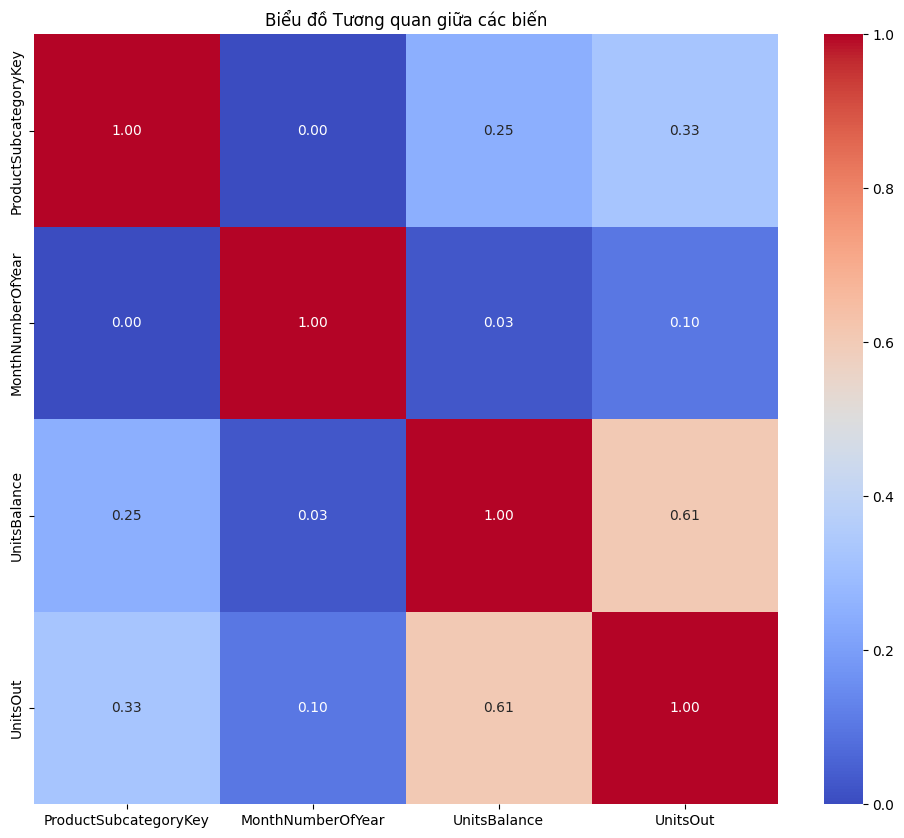

In [9]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot  =True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Biểu đồ Tương quan giữa các biến')
display()

In [10]:
# Lấy độ tương quan của tất cả các biến với biến "UnitsBalance"
correlation_with_UnitsBalance = correlation_matrix["UnitsBalance"]
display(correlation_with_UnitsBalance)

ProductSubcategoryKey    0.249747
MonthNumberOfYear        0.027280
UnitsBalance             1.000000
UnitsOut                 0.607990
Name: UnitsBalance, dtype: float64

In [11]:
Grouped['Inventory'] = Grouped['UnitsBalance'] - Grouped['UnitsOut']
# chuẩn bị biến mục tiêu
X = Grouped[['ProductSubcategoryKey', 'MonthNumberOfYear']]
y = Grouped['Inventory']

RANDOM FOREST

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Tạo và huấn luyện mô hình Random Forest
Model = RandomForestRegressor(n_estimators = 100, random_state = 42)
Model .fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Đưa ra dự đoán trên tập test đã chia chỉ số
y_pred = Model.predict(X_test_scaled)

In [17]:
X_train

,ProductSubcategoryKey,MonthNumberOfYear
199,37,8
93,23,10
38,19,3
24,3,1
96,25,1
...,...,...
106,25,11
14,2,3
92,23,9
179,31,12


In [18]:
y_train

199    477954
93        -33
38      -4001
24       6672
96         28
        ...  
106        -3
14      45072
92          2
179    -10081
102      -128
Name: Inventory, Length: 163, dtype: int64

In [20]:
# Tạo và huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Đưa ra dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [22]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 115986535.56
R-squared: 0.98


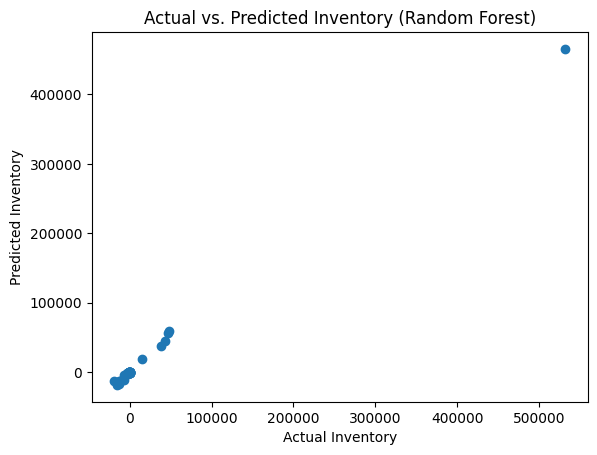

In [23]:
# Actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Inventory')
plt.ylabel('Predicted Inventory')
plt.title('Actual vs. Predicted Inventory (Random Forest)')
plt.show()

In [24]:
def predict_inventory(product_subcategory, month):
    input_data = pd.DataFrame({
        'ProductSubcategoryKey': [product_subcategory],
        'MonthNumberOfYear': [month]})

    # Dự đoán
    inventory = model.predict(input_data)[0]
    return inventory

# Dự đoán tồn kho cho product subcategory và month
product_subcategory = 1
month = 1
inventory = predict_inventory(product_subcategory, month)
print(f"Predicted inventory for product subcategory {product_subcategory} in month {month}: {inventory:.2f}")

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inventory_list = []
for month in month_list:
    inventory = predict_inventory(product_subcategory, month)
    inventory_list.append(int(inventory))

# Tạo df và lưu kết quả
actual_inventory_list = []
for month in month_list:
    actual_inventory = Grouped[(Grouped['ProductSubcategoryKey'] == product_subcategory) & (Grouped['MonthNumberOfYear'] == month)]['Inventory'].values[0]
    actual_inventory_list.append(actual_inventory)
results = pd.DataFrame({
    'MonthNumberOfYear': month_list,
    'PredictedInventory': inventory_list,
    'ActualInventory': actual_inventory_list
})
print("Predict Inventory for Product Subcategory:", product_subcategory)
results

Predicted inventory for product subcategory 1 in month 1: 20909.73
Predict Inventory for Product Subcategory: 1


,MonthNumberOfYear,PredictedInventory,ActualInventory
0,1,20909,21092
1,2,20026,19039
2,3,22087,22714
3,4,24027,24268
4,5,26914,25829
5,6,35718,39529
6,7,33964,32024
7,8,35089,35478
8,9,35921,35786
9,10,37963,38475
